In [1]:
# REDUCE THE PROBLEM TO 10 ASSESTS
# adterwards insert manualy the A array for both inequality constraints
# make sure each constrint recive only x value 
# run the function. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize 

In [3]:
df = pd.read_csv('data/all_stocks_5yr.csv')

## First exploring: 

In [4]:
print(df.shape)

df.head()

(619040, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [63]:
df['Name'].nunique()

505

In [64]:
N = 10

In [65]:
# Choosing the top 100 assets based on mean volume:
list_top_10_assets = df.groupby(['Name'])['volume'].mean().sort_values(ascending=False).head(N).reset_index()['Name'].tolist()


In [66]:
list_top_10_assets

['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO']

In [67]:
df_top_10 = df[df['Name'].isin(list_top_10_assets)].reset_index(drop=True)

In [68]:
print(df_top_10.shape)
df_top_10.head()

(12590, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [69]:
# Verifing that the data contains only 100 assests: 
df_top_10['Name'].nunique()

10

In [70]:
# "AAL":{'beta':beta, 'return_stock':return value}

In [71]:
# adding a column that contain the mean per day to detemine the market close per this day. 
df_top_10['market_close']=df_top_10.groupby('date')['close'].transform('mean')

In [72]:
df_top_10

,date,open,high,low,close,volume,Name,market_close
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,22.38092
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,22.49814
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,22.28478
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,22.43431
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,22.48956
...,...,...,...,...,...,...,...,...
12585,2018-02-01,43.0400,44.0900,42.1000,42.4900,35713522,MU,65.96600
12586,2018-02-02,42.0000,42.2100,40.6100,40.8200,40657381,MU,64.12100
12587,2018-02-05,40.1400,41.5300,39.0100,39.4000,45796837,MU,61.54300
12588,2018-02-06,40.5500,43.9300,40.5500,43.8800,66972802,MU,63.75100


In [73]:
df_1 = df_top_10[['date','close','Name']]

In [74]:
df_2 = pd.DataFrame()
df_2 = df_top_10[['date','market_close']].drop_duplicates()
df_2['Name'] = 'market'
df_2.rename(columns={'market_close':'close'},inplace=True)

In [75]:
df_all = pd.concat([df_1,df_2])

In [76]:
df_all['Name'].nunique()

11

In [77]:
df_all.rename(columns={'Name':'name'},inplace=True)
df_all = df_all.reset_index(drop=True)
df_all = df_all[['date','name','close']]

In [78]:
data = df_all.pivot(index='date',columns='name',values='close')#.sort_values(by='date', ascending=False)

In [79]:
data

name,AAPL,AMD,BAC,CSCO,F,FB,GE,INTC,MSFT,MU,market
date,,,,,,,,,,,
2013-02-08,67.8542,2.59,11.760,21.16,13.10,28.5450,22.50,21.00,27.55,7.75,22.38092
2013-02-11,68.5614,2.67,11.860,21.27,13.11,28.2600,22.45,21.03,27.86,7.91,22.49814
2013-02-12,66.8428,2.77,12.245,20.97,13.08,27.3700,22.58,21.19,27.88,7.92,22.28478
2013-02-13,66.7156,2.75,12.170,21.14,13.04,27.9075,23.39,21.25,28.03,7.95,22.43431
2013-02-14,66.6556,2.75,12.130,20.99,13.11,28.5000,23.41,21.23,28.04,8.08,22.48956
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,167.7800,13.25,32.500,41.70,10.92,193.0900,16.02,47.65,94.26,42.49,65.96600
2018-02-02,160.5000,12.45,31.950,40.93,10.71,190.2800,15.64,46.15,91.78,40.82,64.12100
2018-02-05,156.4900,11.57,30.260,38.78,10.24,181.2600,14.91,44.52,88.00,39.40,61.54300


In [86]:
df_test = data.reset_index(drop=False)

In [94]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [97]:
#df_test['date'].dtype

In [98]:
df_test = df_test.resample("M", on='date').mean()

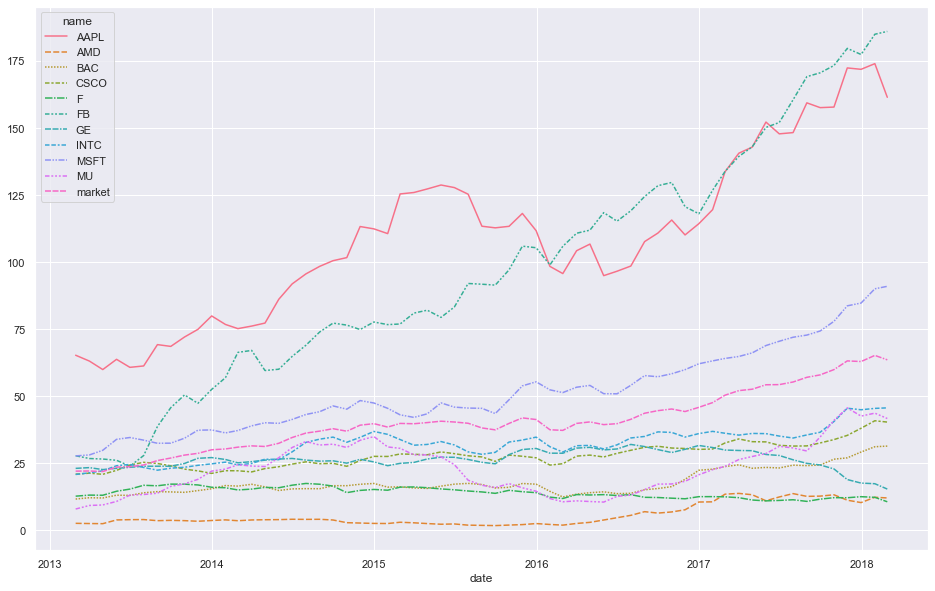

In [99]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(16, 10))
sns.lineplot(data =df_test)
plt.show()

In [71]:
returns = (data/data.shift())-1
returns

name,AAPL,AMD,BAC,CSCO,F,FB,GE,INTC,MSFT,MU,market
date,,,,,,,,,,,
2013-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,0.010422,0.030888,0.008503,0.005198,0.000763,-0.009984,-0.002222,0.001429,0.011252,0.020645,0.005237
2013-02-12,-0.025067,0.037453,0.032462,-0.014104,-0.002288,-0.031493,0.005791,0.007608,0.000718,0.001264,-0.009483
2013-02-13,-0.001903,-0.007220,-0.006125,0.008107,-0.003058,0.019638,0.035872,0.002832,0.005380,0.003788,0.006710
2013-02-14,-0.000899,0.000000,-0.003287,-0.007096,0.005368,0.021231,0.000855,-0.000941,0.000357,0.016352,0.002463
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,0.002090,-0.035662,0.015625,0.003852,-0.004558,0.033175,-0.009276,-0.010179,-0.007894,-0.028134,0.006177
2018-02-02,-0.043390,-0.060377,-0.016923,-0.018465,-0.019231,-0.014553,-0.023720,-0.031480,-0.026310,-0.039303,-0.027969
2018-02-05,-0.024984,-0.070683,-0.052895,-0.052529,-0.043884,-0.047404,-0.046675,-0.035320,-0.041185,-0.034787,-0.040205


In [24]:
# calculation for beta:
cov = returns.cov()
var = returns['market'].var()

In [25]:
beta = cov/var

In [26]:
# only last row relevent: 
beta

name,AAPL,AMD,BAC,CSCO,F,FB,GE,INTC,MSFT,MU,market
name,,,,,,,,,,,
AAPL,1.910325,0.926321,0.618367,0.590679,0.555428,0.816936,0.411382,0.604971,0.681948,1.044774,1.031607
AMD,0.926321,12.806754,1.268871,0.772878,1.047818,0.984851,0.677749,1.272350,0.854022,3.028659,1.186436
BAC,0.618367,1.268871,2.223906,0.704587,0.981421,0.797581,0.743192,0.718433,0.696056,1.367696,0.811359
CSCO,0.590679,0.772878,0.704587,1.576777,0.670790,0.548281,0.520642,0.729506,0.702831,1.078033,0.710372
F,0.555428,1.047818,0.981421,0.670790,1.849846,0.560214,0.693384,0.606632,0.589547,1.178529,0.690254
FB,0.816936,0.984851,0.797581,0.548281,0.560214,3.623242,0.517595,0.684596,0.804167,1.233453,1.307008
GE,0.411382,0.677749,0.743192,0.520642,0.693384,0.517595,1.303417,0.508768,0.460105,0.872308,0.558844
INTC,0.604971,1.272350,0.718433,0.729506,0.606632,0.684596,0.508768,1.744920,0.876764,1.397374,0.810317
MSFT,0.681948,0.854022,0.696056,0.702831,0.589547,0.804167,0.460105,0.876764,1.811407,1.077269,0.889045


In [27]:
# Validating the beta using linear regression: 
# x=log_returns['market'].iloc[1:].to_numpy().reshape(-1,1)
# y=log_returns['ABBV'].iloc[1:].to_numpy().reshape(-1,1)

In [28]:
# linalg = LinearRegression()
# linalg.fit(x,y)
# linalg.coef_

In [29]:
#log_returns = np.log(data/data.shift())

In [30]:
df_beta = pd.DataFrame(beta.iloc[-1])

In [31]:
df_beta.reset_index(inplace=True)
df_beta = df_beta.rename(columns={'market':'beta'})

In [32]:
df_beta = df_beta.iloc[:10]

In [33]:
# determine the assets that are high voliatality: 
high_vol = df_beta[df_beta['beta']>1]['name'].tolist()

In [34]:
len(high_vol)

4

In [35]:
# determine the assets that are low voliatality: 
low_vol = df_beta[df_beta['beta']<=1]['name'].tolist()

In [37]:
len(low_vol)

6

In [38]:
#np.where(df_beta['beta']<=1,1,0)

In [38]:
# len(high_vol)
# len(low_vol)

In [39]:
# calculating the mean for each asset: 
df_means = pd.DataFrame(np.mean(returns, axis=0))
df_means.reset_index(inplace=True)
df_means = df_means.rename(columns={0:'mean_return'})
df_means = df_means.iloc[0:10]

In [40]:
df_means.head()

,name,mean_return
0,AAPL,0.000786
1,AMD,0.001882
2,BAC,0.000901
3,CSCO,0.000601
4,F,-0.000053


In [41]:
# mean return:
mean_return = np.mean(returns, axis=0).values[0:10]

In [42]:
# cov return:
cov_returns=cov.values[0:10,0:10]

In [46]:
df_beta['beta'].apply(lambda x: (0,1) if x<=1 else (0,0.1)).values

array([(0, 0.1), (0, 0.1), (0, 1), (0, 1), (0, 1), (0, 0.1), (0, 1),
       (0, 1), (0, 1), (0, 0.1)], dtype=object)

In [65]:
# Objective function:

def bi_function_optimization(mean_return,cov_return, gamma, portfolio_size):
    
    
    def f(x, mean_return, cov_return, gamma, portfolio_size):
        port_var = (x@cov_return)@x.T
        port_exp_return = np.array(mean_return)@x.T
        obj_func = gamma*port_var-(1-gamma)*port_exp_return
        return obj_func
    
    def constraint_eq(x):
        A=np.ones(x.shape)
        b=1
        const_val = A@x.T-b
        return const_val

    def constraint_ineq_upper_bound(x):
        A =[[0, 0, 1, 1, 1, 0, 1, 1, 1, 0],[1, 1, 0, 0, 0, 1, 0, 0, 0, 1]]
        upper_bound = np.array([0.6,0.4]).T
        contraint_upper = upper_bound-(A@x.T)
        return contraint_upper

    def constraint_ineq_lower_bound(x):
        A =[[0, 0, 1, 1, 1, 0, 1, 1, 1, 0],[1, 1, 0, 0, 0, 1, 0, 0, 0, 1]]
        lower_bound = np.array([0.01,0.01]).T
        contraint_lower = (A@x.T)-lower_bound 
        return contraint_lower

    x_init=np.repeat(0.01, portfolio_size)
    
    cons = ({'type': 'eq', 'fun':constraint_eq},
        {'type':'ineq', 'fun': constraint_ineq_upper_bound},
        {'type':'ineq', 'fun': constraint_ineq_lower_bound})
    
    bnd = [(0, 0.1), (0, 0.1), (0, 1), (0, 1), (0, 1), (0, 0.1), (0, 1), (0, 1), (0, 1), (0, 0.1)]

    obj_func = optimize.minimize(f, 
                                x0=x_init,
                                args =(mean_return,cov_return, gamma, portfolio_size),
                                method='SLSQP',
                                bounds=bnd,
                                constraints=cons,
                                tol=10**-3)
    
    print(obj_func)
    return obj_func

In [66]:
portfolioSize = df_beta.shape[0]
#initialization
x_optimal =[]

for points in range(0,10):
    gama = points/10.0
    result = bi_function_optimization(mean_return, cov_returns, gama,portfolioSize)
    x_optimal.append(result.x)

     fun: -0.0009019137671851763
     jac: array([-7.86196691e-04, -1.88166254e-03, -9.01188849e-04, -6.00653806e-04,
        5.27155171e-05, -1.66042167e-03,  2.36585010e-04, -7.06364977e-04,
       -1.03887412e-03, -1.71955744e-03])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.1       , 0.1       , 0.10040823, 0.10010769, 0.09945432,
       0.1       , 0.09927045, 0.1002134 , 0.10054591, 0.1       ])
     fun: -0.00079905096915892
     jac: array([-7.05757476e-04, -1.68822562e-03, -8.08813658e-04, -5.38828212e-04,
        4.93911475e-05, -1.49202268e-03,  2.14422197e-04, -6.33689730e-04,
       -9.33079546e-04, -1.54336310e-03])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.1       , 0.1       , 0.10036705, 0.10009706, 0.09950884,
       0.1       , 0.09934381, 0.10019192, 0.10049131, 0.1       ])
     fun: -0.000

In [ ]:
min_risk_point = []
exp_portfolio_return_point =[]

In [69]:
x_optimal_array = np.array(x_optimal)
min_risk_point = np.diagonal((x_optimal_array@cov_returns)@x_optimal_array.T)
# trading days = 251: 
risk_point = np.sqrt(min_risk_point*251)
exp_protfolio_return_point = x_optimal_array@mean_return
ret_point = 251*np.array(exp_protfolio_return_point)
np.set_printoptions(precision=23, suppress=True)

print("Optimal weights of the efficient set portfolios\n:",x_optimal_array)
print("Annualized risk and return of the efficient set portfolios\n:", np.c_[risk_point,ret_point])

Optimal weights of the efficient set portfolios
: [[0.1                 0.1                 0.10040822531082085
  0.10010769026812337 0.09945432094500577 0.1
  0.09927045145250303 0.1002134014393959  0.10054591058415087
  0.1                ]
 [0.1                 0.1                 0.10036704735809202
  0.10009706191228057 0.09950884255228326 0.1
  0.09934381150266441 0.10019192342930783 0.10049131324537175
  0.1                ]
 [0.1                 0.09999999999999999 0.10032586940324104
  0.10008643355613453 0.0995633641592576  0.09999999999999999
  0.0994171715543416  0.10017044541982606 0.10043671590719888
  0.09999999999999999]
 [0.1                 0.09999999999999999 0.10028469145096701
  0.10007580520074648 0.09961788576608037 0.09999999999999999
  0.09949053160495762 0.10014896740928324 0.10038211856796501
  0.09999999999999999]
 [0.1                 0.1                 0.10024351349755609
  0.10006517684467633 0.09967240737358524 0.1
  0.09956389165534643 0.10012748939942

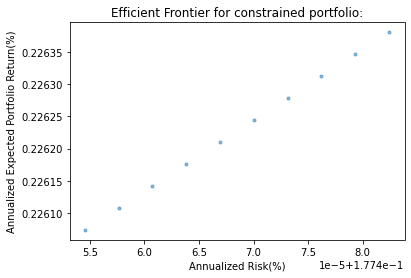

In [70]:
no_points = risk_point.size

area = np.pi*3

plt.title("Efficient Frontier for constrained portfolio:")
plt.xlabel("Annualized Risk(%)")
plt.ylabel("Annualized Expected Portfolio Return(%)")
plt.scatter(risk_point, ret_point, s=area, alpha =0.5)
plt.show()